In [1]:
%load_ext autoreload
%autoreload 2
import sys
from os import path
import os


sys.path.insert(0, "../../")
sys.path.insert(0, "./")

from isanet.neural_network import MLPRegressor
from isanet.model import Mlp
from isanet.optimizer import SGD
from isanet.utils.model_utils import printMSE, printAcc, plotMse, save_data, load_data
from isanet.optimizer import EarlyStopping
from isanet.model_selection import Kfold, GridSearchCV
from isanet.metrics import mse, mee, accuracy_binary

import numpy as np
import time
import datetime
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [18]:
df1 = pd.DataFrame(load_data("../grid/large_grid_1_result.data"))
df2 = pd.DataFrame(load_data("../grid/large_grid_2_result.data"))
df3 = pd.DataFrame(load_data("../grid/large_grid_3_result2.data"))
frames = [df1, df2, df3]
result = pd.concat(frames)
result = result.sort_values(by=['mean_val_mse'])
result.reset_index(drop=True, inplace=True)

In [19]:
best_7 = result[:7]
best_7

,hyper_param,fold_results,mean_train_mse,std_train_mse,mean_train_mee,std_train_mee,mean_train_acc,std_train_acc,mean_val_mse,std_val_mse,mean_val_mee,std_val_mee,mean_val_acc,std_val_acc,time_train
0,"{'n_layer_units': [80], 'learning_rate': 0.06,...","{'train_mse': [0.581905075211953, 0.7334597015...",0.644397,0.060510,0.878052,0.040701,0.0,0.0,1.001392,0.118916,1.076980,0.035126,0.0,0.0,746.076472
1,"{'n_layer_units': [100], 'learning_rate': 0.03...","{'train_mse': [0.5754190545206966, 0.741533023...",0.619789,0.148708,0.859519,0.107869,0.0,0.0,1.015994,0.083095,1.095059,0.015840,0.0,0.0,379.124256
2,"{'n_layer_units': [40], 'learning_rate': 0.03,...","{'train_mse': [0.5481725868104821, 0.669509268...",0.657108,0.065330,0.887568,0.043153,0.0,0.0,1.020296,0.084351,1.094002,0.027966,0.0,0.0,99.970390
3,"{'n_layer_units': [80], 'learning_rate': 0.06,...","{'train_mse': [0.6032044319378351, 0.795905693...",0.705991,0.079237,0.912469,0.054588,0.0,0.0,1.021330,0.075646,1.096636,0.019254,0.0,0.0,242.646410
4,"{'n_layer_units': [80], 'learning_rate': 0.03,...","{'train_mse': [0.6110191287540307, 0.726815217...",0.630072,0.059361,0.870416,0.042402,0.0,0.0,1.021409,0.107647,1.094915,0.032765,0.0,0.0,198.212681
5,"{'n_layer_units': [40], 'learning_rate': 0.06,...","{'train_mse': [0.7562787649143266, 0.612242231...",0.652145,0.060641,0.879594,0.046026,0.0,0.0,1.025098,0.117991,1.084592,0.045131,0.0,0.0,211.933074
6,"{'n_layer_units': [80], 'learning_rate': 0.03,...","{'train_mse': [0.6666607397266351, 0.655270207...",0.682404,0.084416,0.903882,0.048466,0.0,0.0,1.025721,0.103057,1.090177,0.023905,0.0,0.0,641.898938


In [4]:
for index, row in best_7.iterrows():
    print("----------------------------------")
    print("             Comb {}              ".format(index))
    print(row['hyper_param'])

----------------------------------
             Comb 0              
{'n_layer_units': [80], 'learning_rate': 0.06, 'max_epoch': 30000, 'momentum': 0.6, 'nesterov': True, 'kernel_regularizer': 0.0001, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
----------------------------------
             Comb 1              
{'n_layer_units': [100], 'learning_rate': 0.03, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0001, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
----------------------------------
             Comb 2              
{'n_layer_units': [40], 'learning_rate': 0.03, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0001, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
----------------------------------
             Comb 3              
{'n_layer_units': [150], 'learning_rate': 0.03, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.00

----------------------------------
             Comb 0              
----------------------------------
{'n_layer_units': [80], 'learning_rate': 0.06, 'max_epoch': 30000, 'momentum': 0.6, 'nesterov': True, 'kernel_regularizer': 0.0001, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
train mse folds: [0.581905075211953, 0.733459701595166, 0.5960727571861113, 0.6661495596011241]
val mse folds: [1.1488344452048995, 0.9375635014435105, 1.0763201139615373, 0.8428479829659279]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 0              
MSE val: 0.581905075211953 
MSE val: 1.1488344452048995 


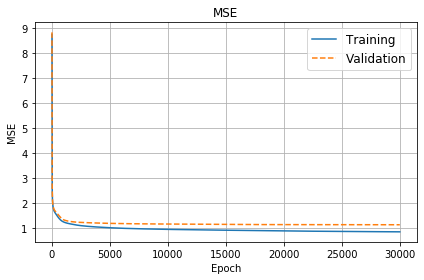

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


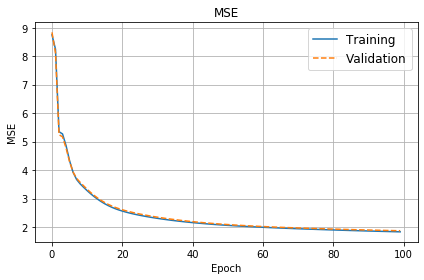

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


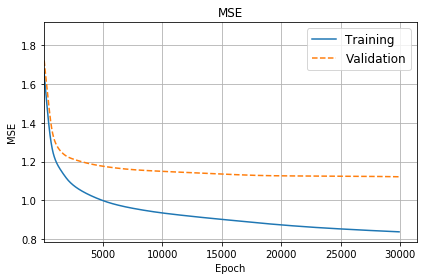

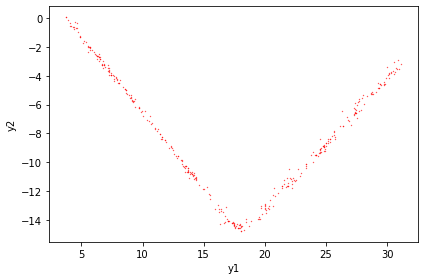

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 1              
MSE val: 0.733459701595166 
MSE val: 0.9375635014435105 


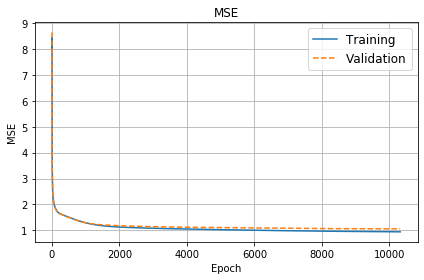

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


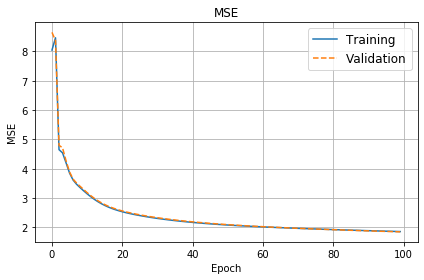

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


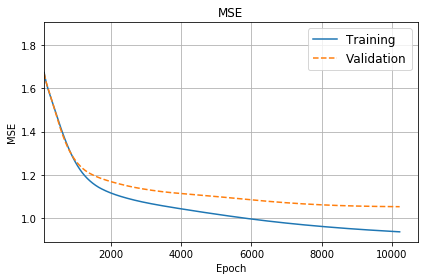

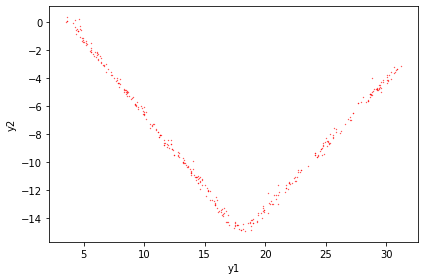

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 2              
MSE val: 0.5960727571861113 
MSE val: 1.0763201139615373 


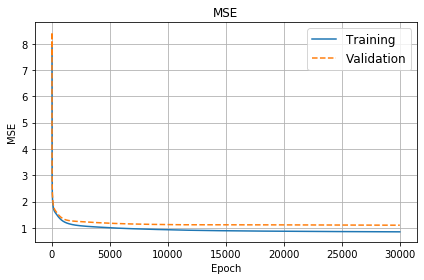

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


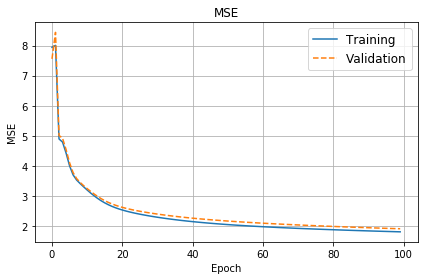

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


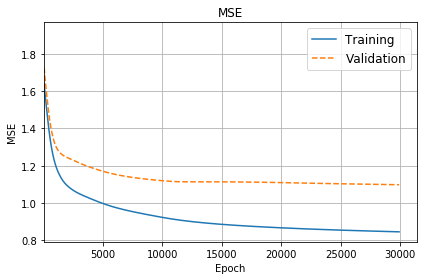

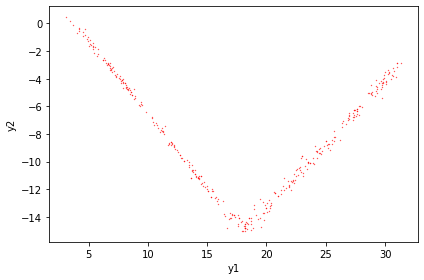

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 3              
MSE val: 0.6661495596011241 
MSE val: 0.8428479829659279 


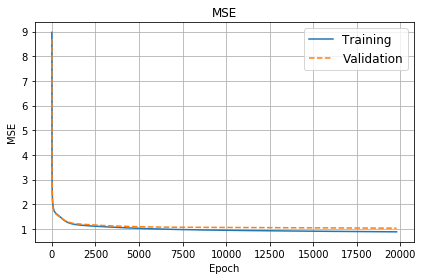

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


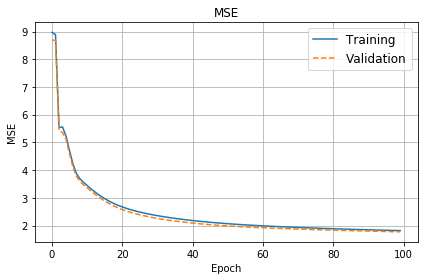

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


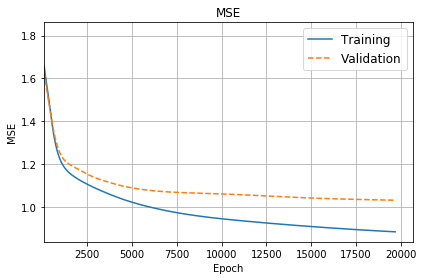

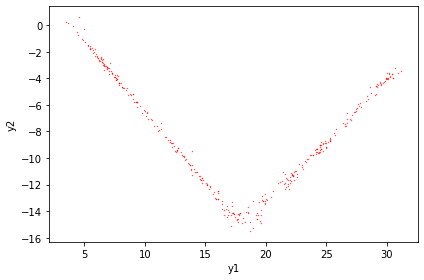

training: 0.6443967733985886+/-0.060509940860314956
validation: 1.0013915108939688+/-0.11891570488601573
----------------------------------
             Comb 1              
----------------------------------
{'n_layer_units': [100], 'learning_rate': 0.03, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0001, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
train mse folds: [0.5754190545206966, 0.7415330234171581, 0.39580069984496685, 0.7664013807287633]
val mse folds: [1.1269126023743463, 0.9773454500164465, 1.054729035925939, 0.9049880741786943]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 0              
MSE val: 0.5754190545206966 
MSE val: 1.1269126023743463 


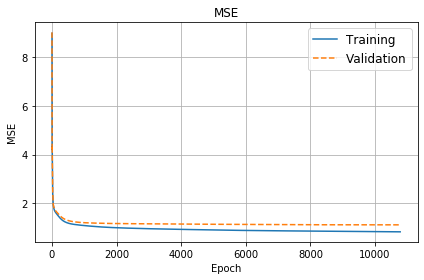

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


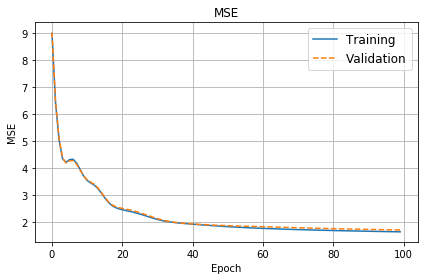

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


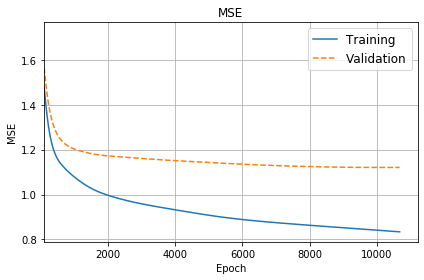

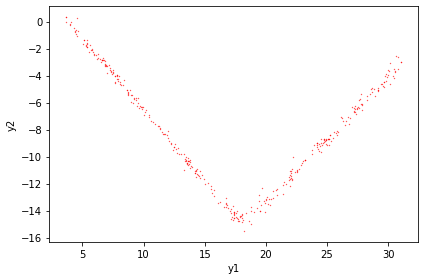

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 1              
MSE val: 0.7415330234171581 
MSE val: 0.9773454500164465 


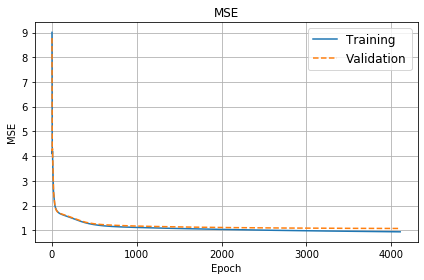

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


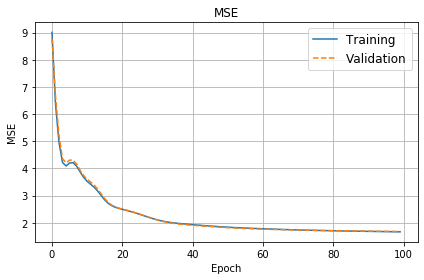

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


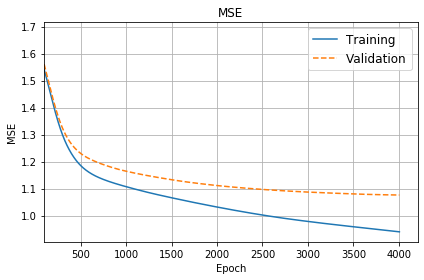

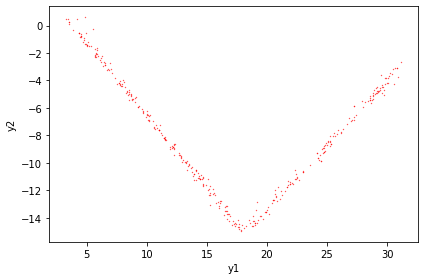

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 2              
MSE val: 0.39580069984496685 
MSE val: 1.054729035925939 


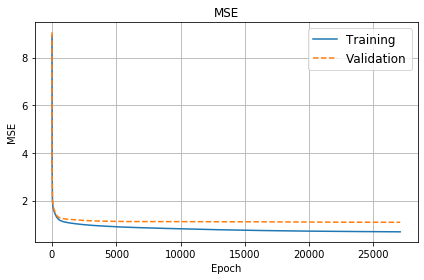

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


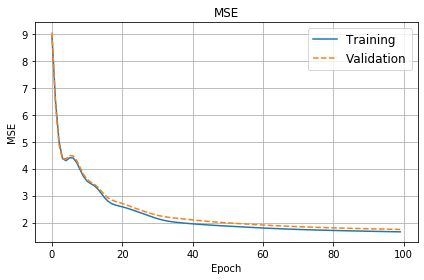

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


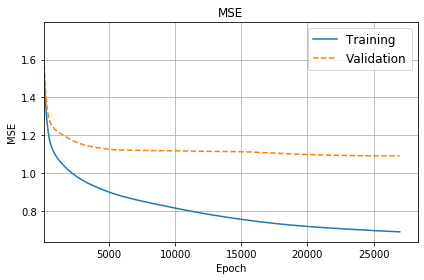

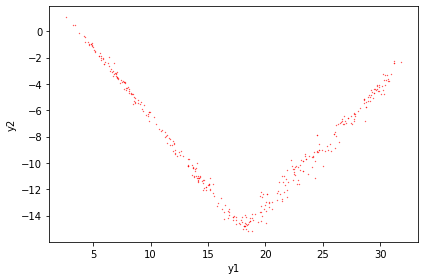

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 3              
MSE val: 0.7664013807287633 
MSE val: 0.9049880741786943 


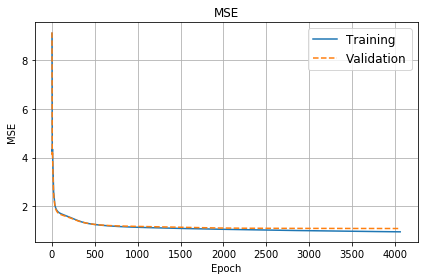

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


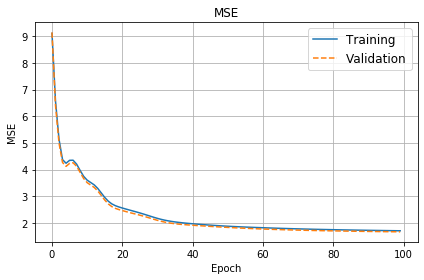

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


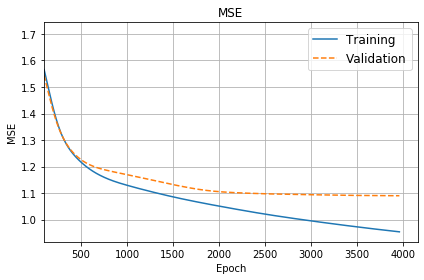

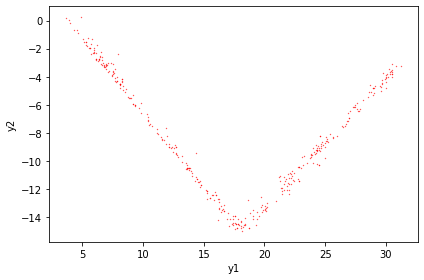

training: 0.6197885396278962+/-0.14870797565033556
validation: 1.0159937906238565+/-0.0830953749374224
----------------------------------
             Comb 2              
----------------------------------
{'n_layer_units': [40], 'learning_rate': 0.03, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0001, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
train mse folds: [0.5481725868104821, 0.6695092680026384, 0.6913807381014402, 0.7193696257748335]
val mse folds: [1.0631411226456302, 0.983773820779461, 1.1295406990004109, 0.9047265784774053]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 0              
MSE val: 0.5481725868104821 
MSE val: 1.0631411226456302 


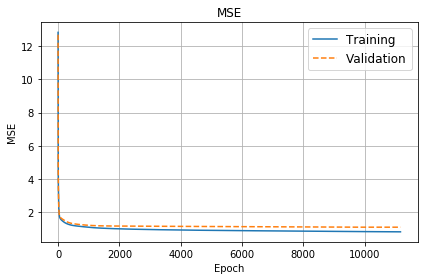

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


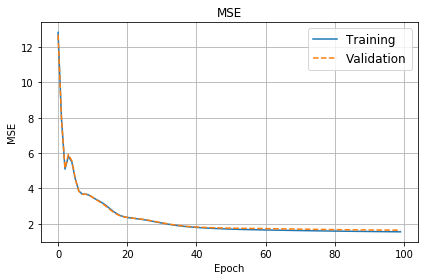

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


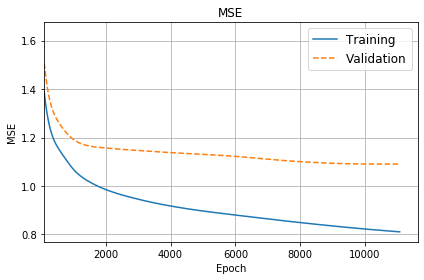

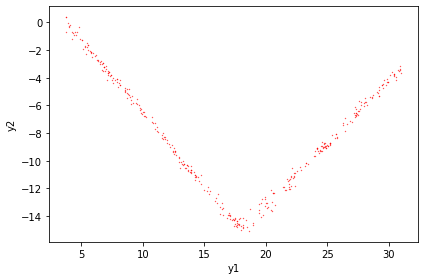

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 1              
MSE val: 0.6695092680026384 
MSE val: 0.983773820779461 


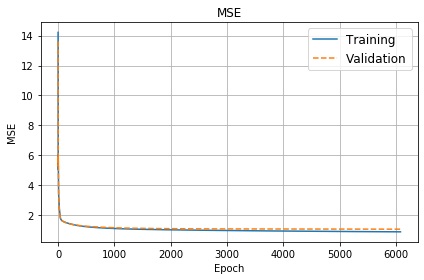

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


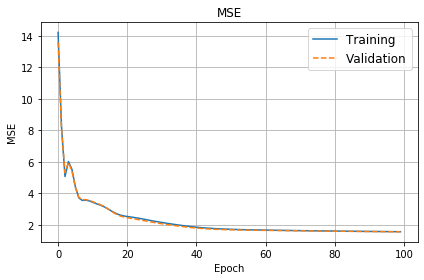

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


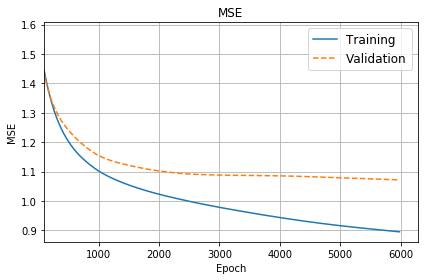

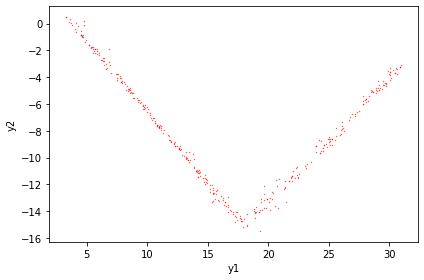

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 2              
MSE val: 0.6913807381014402 
MSE val: 1.1295406990004109 


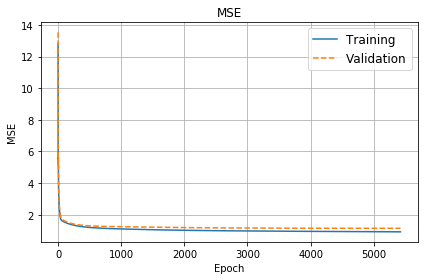

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


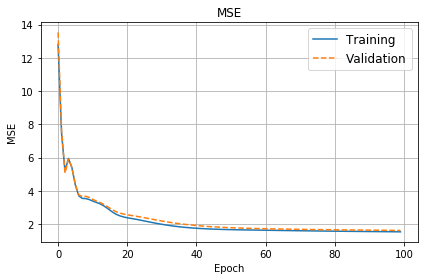

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


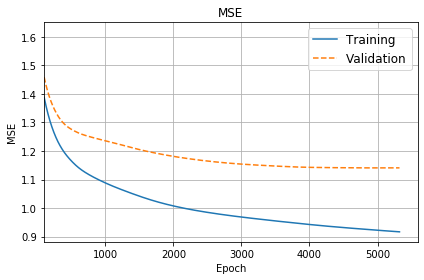

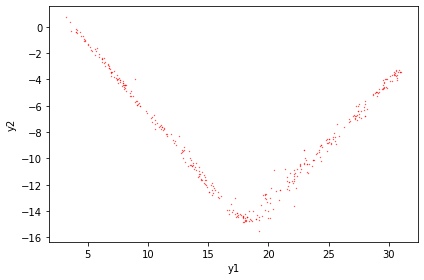

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 3              
MSE val: 0.7193696257748335 
MSE val: 0.9047265784774053 


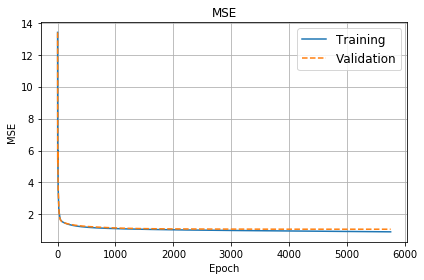

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


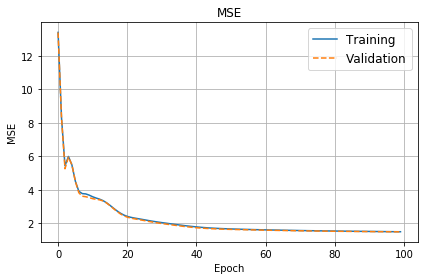

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


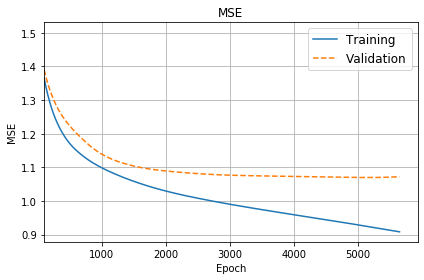

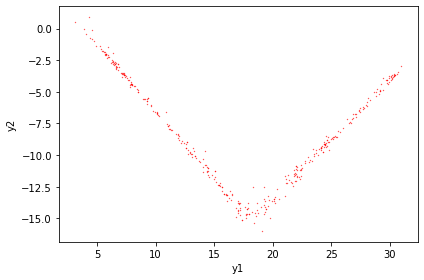

training: 0.6571080546723486+/-0.06532963782986943
validation: 1.020295555225727+/-0.08435085885677529
----------------------------------
             Comb 3              
----------------------------------
{'n_layer_units': [150], 'learning_rate': 0.03, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0001, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
train mse folds: [0.5971748562243091, 0.7276486446120847, 0.6275052607555343, 0.6262668944136991]
val mse folds: [1.1086288488482963, 0.9643207659052772, 1.0909269406615942, 0.9207644738388285]
----------------------------------
             Fold 0              
MSE val: 0.5971748562243091 
MSE val: 1.1086288488482963 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


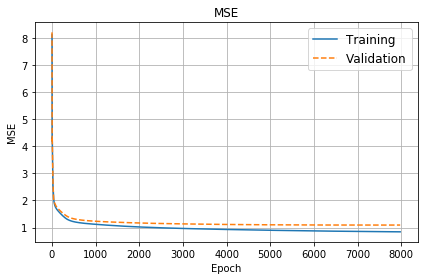

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


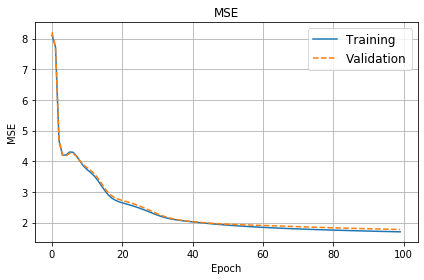

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


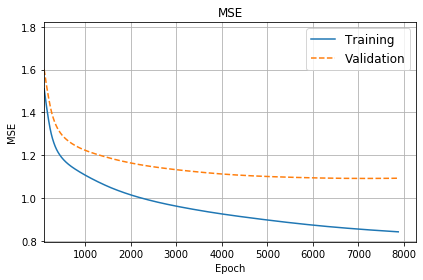

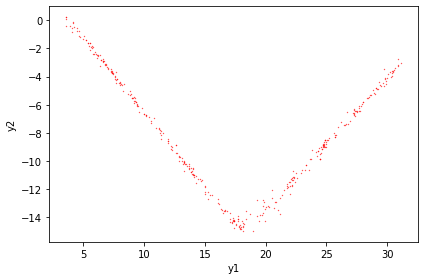

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 1              
MSE val: 0.7276486446120847 
MSE val: 0.9643207659052772 


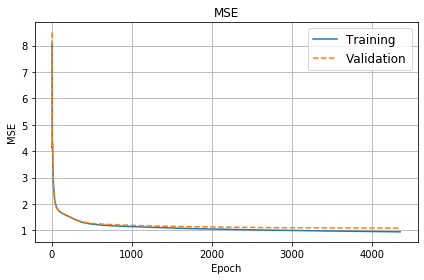

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


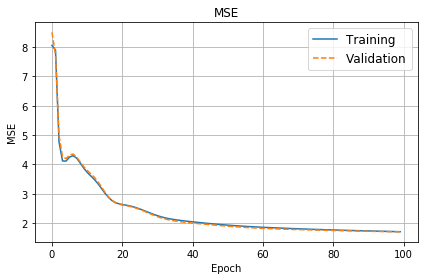

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


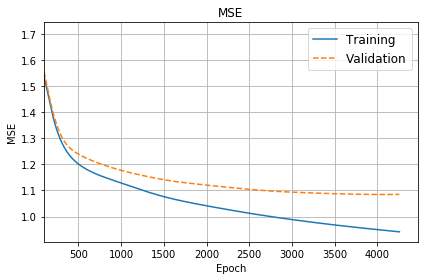

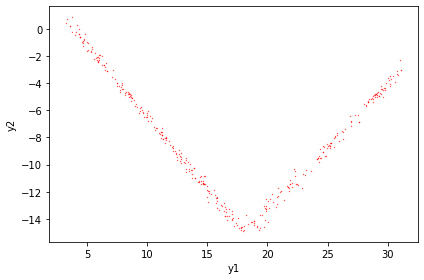

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 2              
MSE val: 0.6275052607555343 
MSE val: 1.0909269406615942 


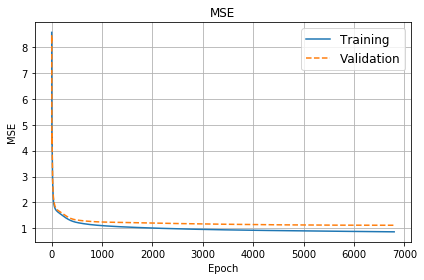

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


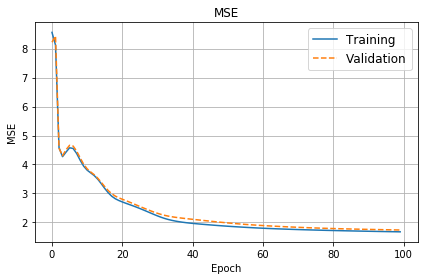

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


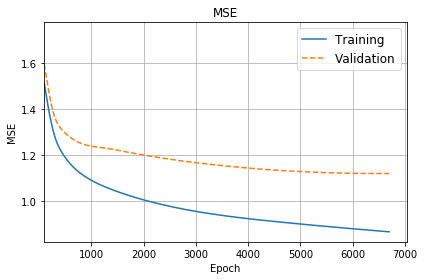

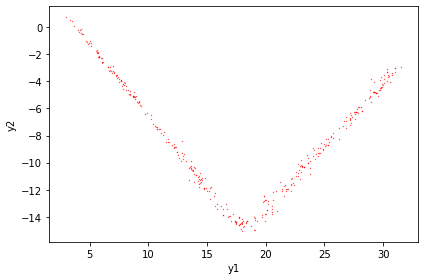

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 3              
MSE val: 0.6262668944136991 
MSE val: 0.9207644738388285 


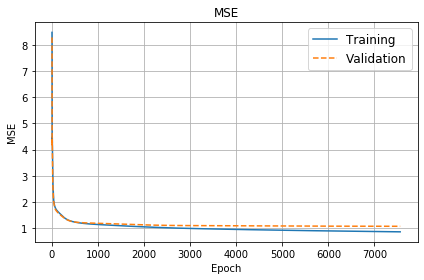

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


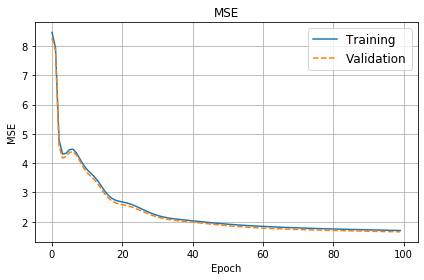

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


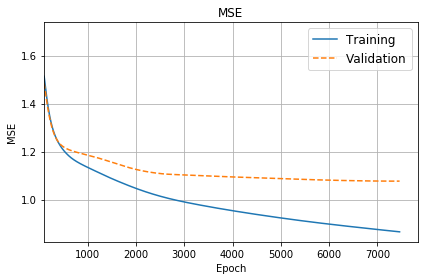

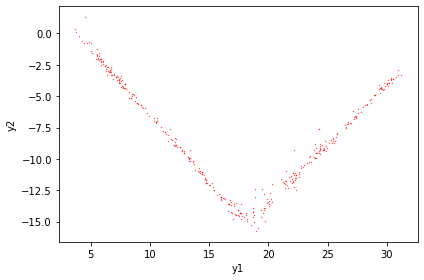

training: 0.6446489140014068+/-0.049433149135994496
validation: 1.021160257313499+/-0.08035574922417318
----------------------------------
             Comb 4              
----------------------------------
{'n_layer_units': [80], 'learning_rate': 0.06, 'max_epoch': 30000, 'momentum': 0.8, 'nesterov': True, 'kernel_regularizer': 0.0001, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
train mse folds: [0.6032044319378351, 0.7959056936603368, 0.6559413574547828, 0.7689123929547802]
val mse folds: [1.0858070874235746, 1.009351116597103, 1.0878447997296716, 0.9023162175521987]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 0              
MSE val: 0.6032044319378351 
MSE val: 1.0858070874235746 


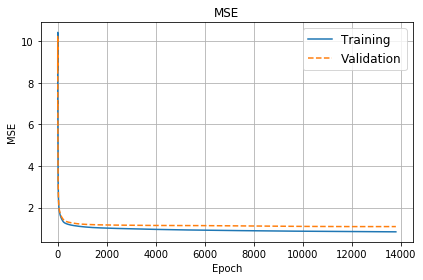

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


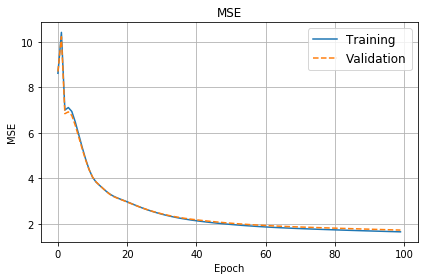

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


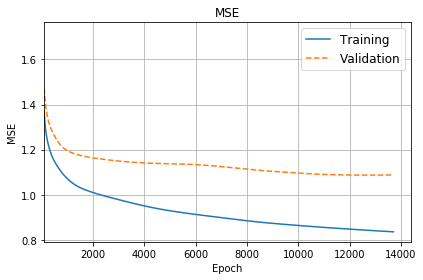

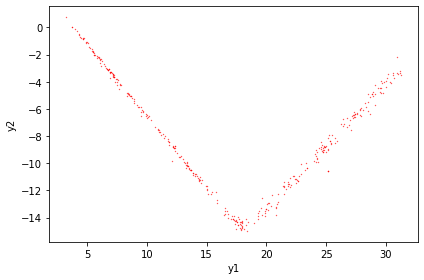

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 1              
MSE val: 0.7959056936603368 
MSE val: 1.009351116597103 


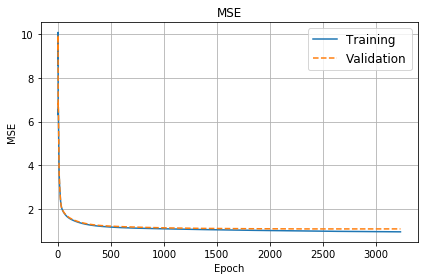

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


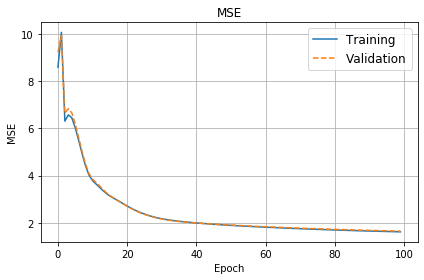

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


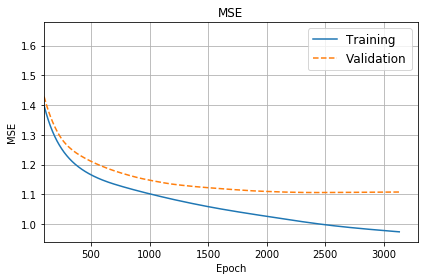

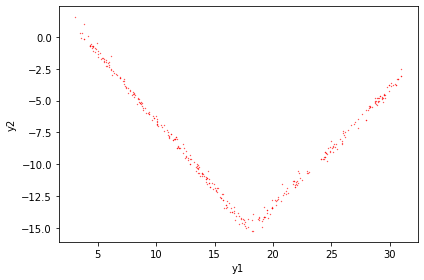

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 2              
MSE val: 0.6559413574547828 
MSE val: 1.0878447997296716 


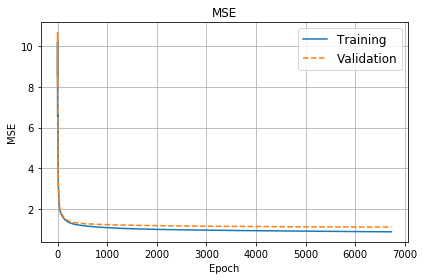

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


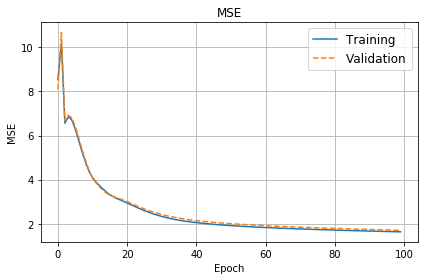

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


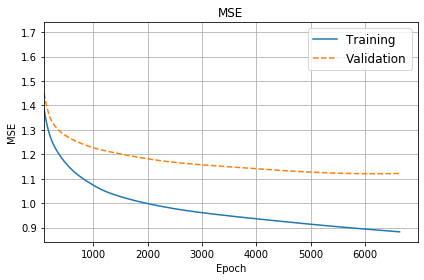

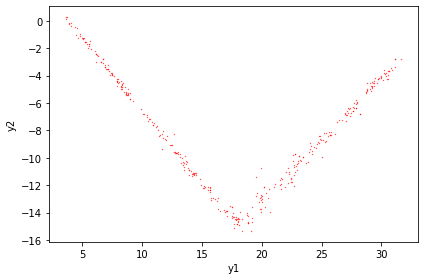

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 3              
MSE val: 0.7689123929547802 
MSE val: 0.9023162175521987 


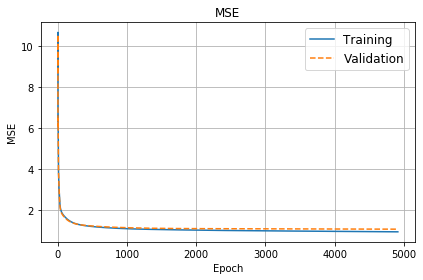

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


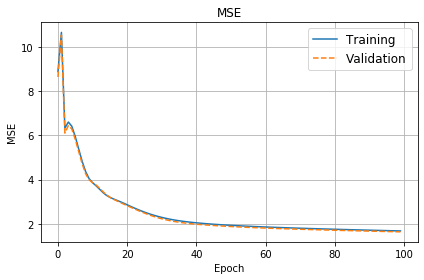

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


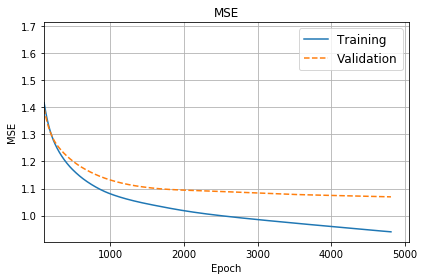

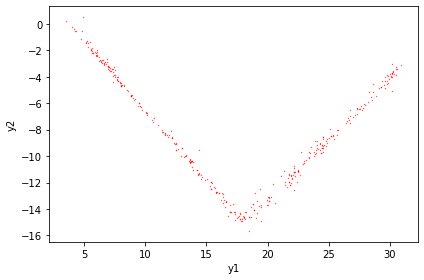

training: 0.7059909690019337+/-0.07923666941558735
validation: 1.0213298053256368+/-0.07564603004399303
----------------------------------
             Comb 5              
----------------------------------
{'n_layer_units': [80], 'learning_rate': 0.03, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0001, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
train mse folds: [0.6110191287540307, 0.7268152179014742, 0.5651987621999507, 0.6172549335946396]
val mse folds: [1.149966914290374, 0.9799516851178998, 1.088112005780545, 0.8676036673242257]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 0              
MSE val: 0.6110191287540307 
MSE val: 1.149966914290374 


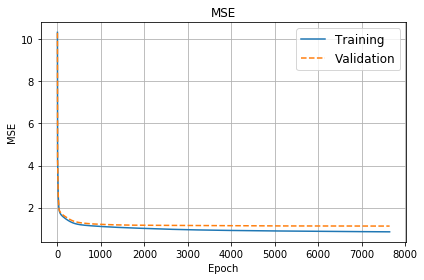

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


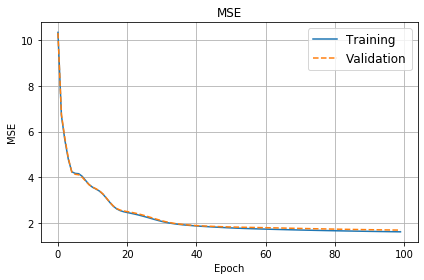

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


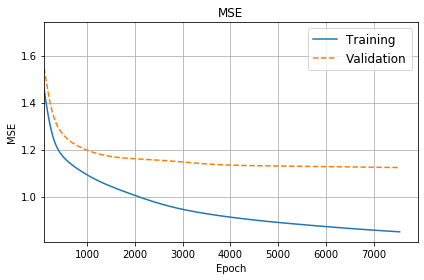

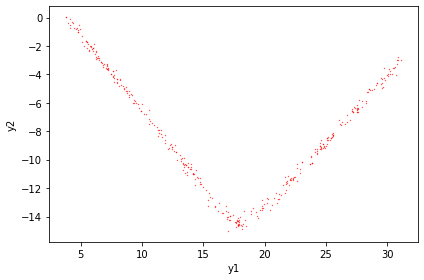

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 1              
MSE val: 0.7268152179014742 
MSE val: 0.9799516851178998 


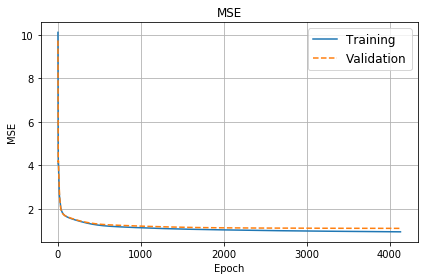

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


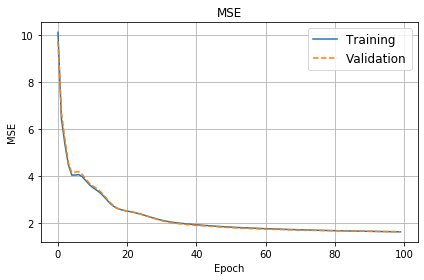

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


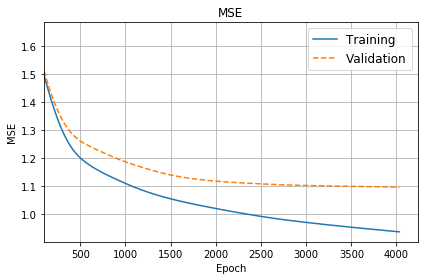

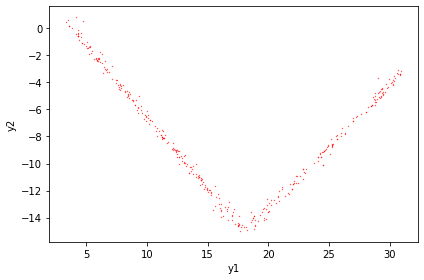

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 2              
MSE val: 0.5651987621999507 
MSE val: 1.088112005780545 


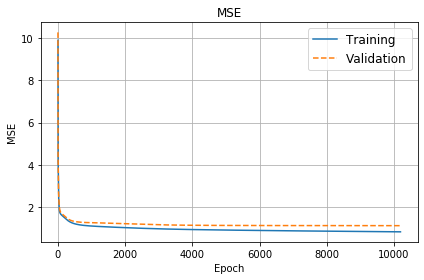

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


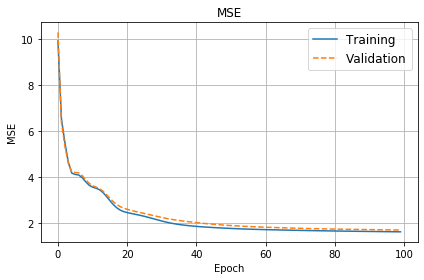

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


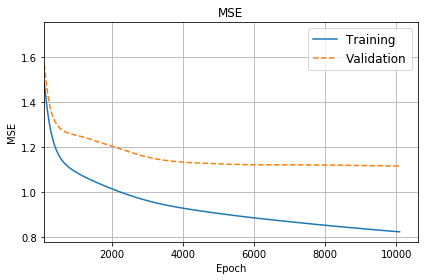

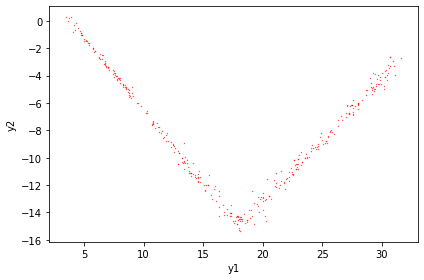

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 3              
MSE val: 0.6172549335946396 
MSE val: 0.8676036673242257 


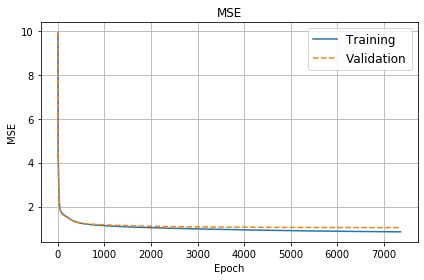

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


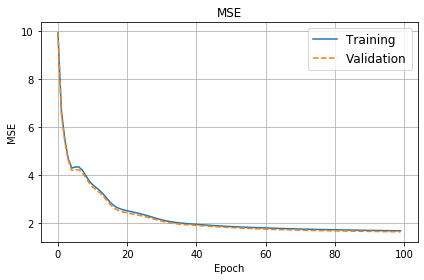

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


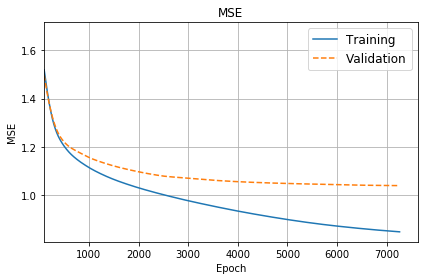

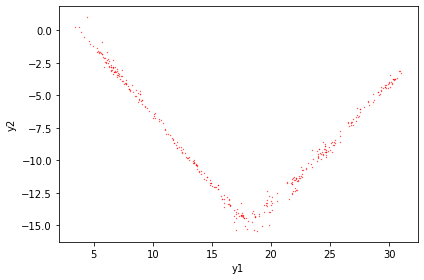

training: 0.6300720106125237+/-0.0593613432432006
validation: 1.0214085681282612+/-0.10764666462882594
----------------------------------
             Comb 6              
----------------------------------
{'n_layer_units': [40], 'learning_rate': 0.06, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0005, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
train mse folds: [0.7562787649143266, 0.612242231031956, 0.6097727466772174, 0.6302848303470637]
val mse folds: [1.1865178332302126, 0.9641761364171267, 1.0769999442737486, 0.8726968218772163]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 0              
MSE val: 0.7562787649143266 
MSE val: 1.1865178332302126 


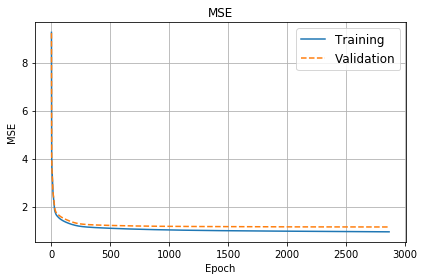

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


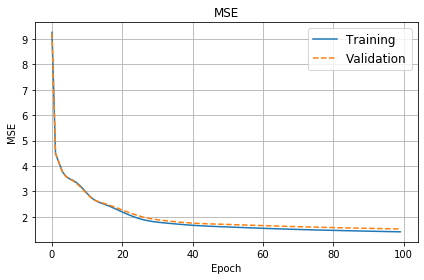

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


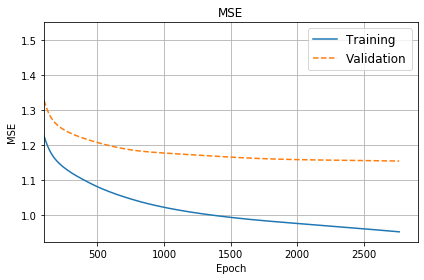

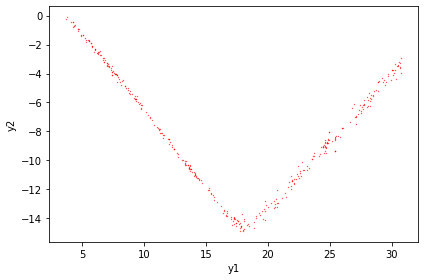

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 1              
MSE val: 0.612242231031956 
MSE val: 0.9641761364171267 


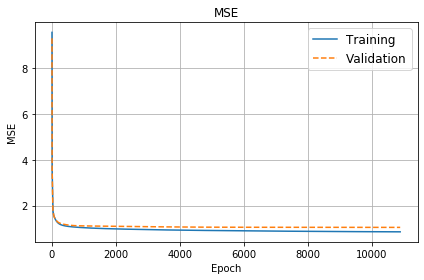

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


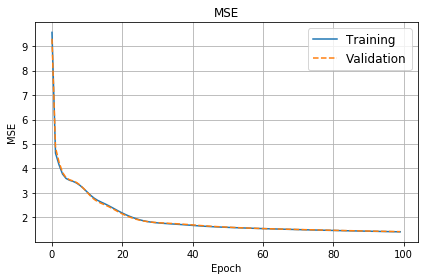

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


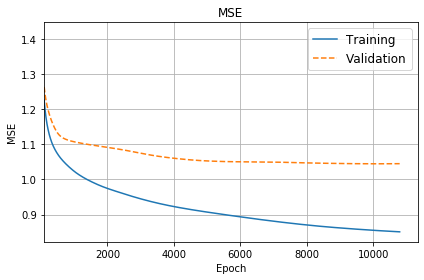

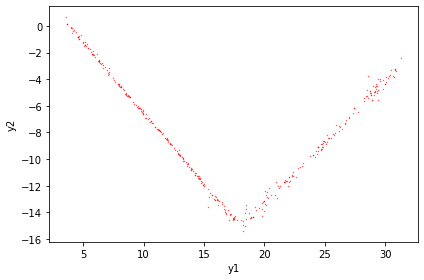

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 2              
MSE val: 0.6097727466772174 
MSE val: 1.0769999442737486 


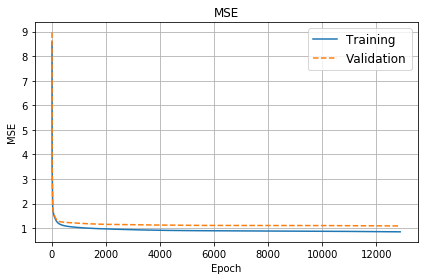

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


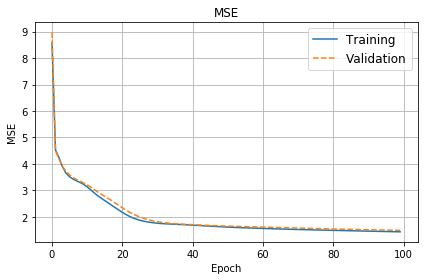

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


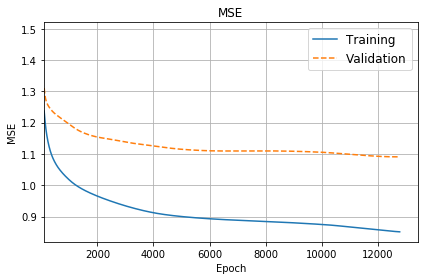

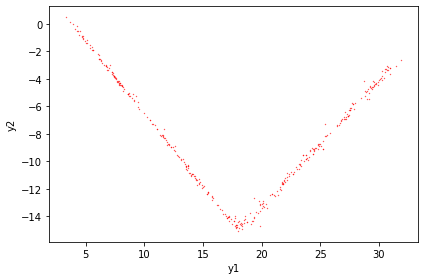

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 3              
MSE val: 0.6302848303470637 
MSE val: 0.8726968218772163 


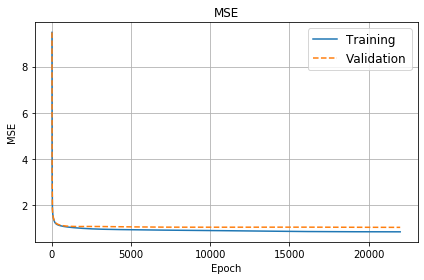

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


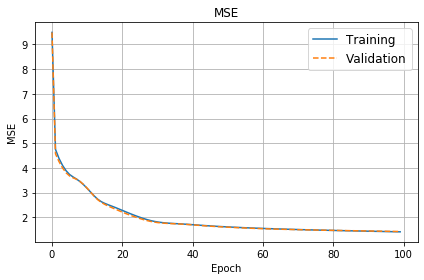

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


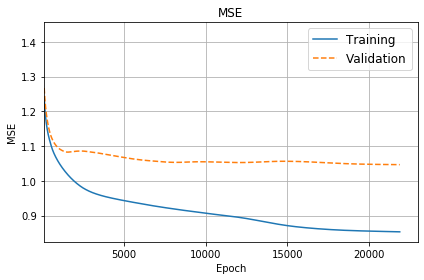

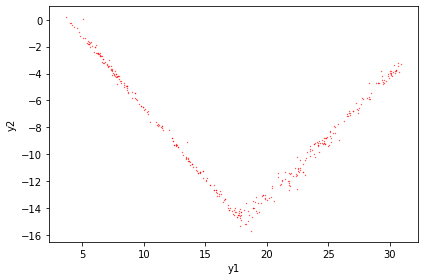

training: 0.6521446432426409+/-0.060641048051104464
validation: 1.025097683949576+/-0.11799127821017967


In [5]:
dataset_f = np.genfromtxt('../dataset/cup10/ML-CUP19-TR_tr_vl_10.csv',delimiter=',')
kfold = load_data("../dataset/cup10/4folds.index")
for index, row in best_7.iterrows():
    print("----------------------------------")
    print("             Comb {}              ".format(index))
    print("----------------------------------")
    print(row['hyper_param'])
    print("train mse folds: {}".format(row['fold_results']["train_mse"]))
    print("val mse folds: {}".format(row['fold_results']["val_mse"]))
    W = copy.deepcopy(row["fold_results"]["init_weigth"])
    
    num_unit = row['hyper_param']["n_layer_units"][0]
    lr = row['hyper_param']["learning_rate"]
    max_epoch = 30000
    momentum = row['hyper_param']["momentum"]
    kernel_regularizer = row['hyper_param']["kernel_regularizer"]
    es = EarlyStopping(0.009, 200, verbose = 0)

    mean_tr_mse = []
    mean_vl_mse = []
    i = 0
    for train_index_fold, val_index_fold, w in zip(kfold["train"], kfold["val"], W):                
        X_train = dataset_f[train_index_fold,:-2]
        Y_train = dataset_f[train_index_fold,-2:]

        X_val = dataset_f[val_index_fold,:-2]
        Y_val = dataset_f[val_index_fold,-2:]

        model = Mlp()
        model.add(num_unit, activation="sigmoid", input= 10, kernel_initializer = np.sqrt(6)/np.sqrt(num_unit + 20), kernel_regularizer = kernel_regularizer)
        model.add(2, activation="linear", kernel_initializer = np.sqrt(6)/np.sqrt(2 + num_unit), kernel_regularizer = kernel_regularizer)

        model.set_optimizer(
            SGD(
                lr = lr,
                momentum = momentum,
                nesterov = True
            )
        )
        model.weights = w

        start_time = time.time()
        model.fit(X_train,
                    Y_train, 
                    epochs=max_epoch, 
                    validation_data = [X_val, Y_val],
                    es = es,
                    verbose=0) 

        out = model.predict(X_train)
        delta = Y_train - out
        mean_tr_mse.append(np.mean(np.square(delta)))

        outputNet = model.predict(X_val)
        delta = Y_val - outputNet
        mean_vl_mse.append(np.mean(np.square(delta)))


        print("----------------------------------")
        print("             Fold {}              ".format(i))
        outputNet = model.predict(X_train)
        printMSE(outputNet, Y_train, type = "val")
        outputNet = model.predict(X_val)    
        printMSE(outputNet, Y_val, type = "val")

        plt.plot(model.history["loss_mee"])
        plt.plot(model.history["val_loss_mee"], linestyle='--')
        plt.title('MSE')
        plt.ylabel('MSE')
        plt.xlabel('Epoch')
        plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
        plt.grid()
        plt.tight_layout()
        plt.savefig("large_grid_img/model_"+str(index)+"/fold"+str(i)+"/full.eps")
        plt.show()

        plt.plot(model.history["loss_mee"][:100])
        plt.plot(model.history["val_loss_mee"][:100], linestyle='--')
        plt.title('MSE')
        plt.ylabel('MSE')
        plt.xlabel('Epoch')
        plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
        plt.grid()
        plt.tight_layout()
        plt.savefig("large_grid_img/model_"+str(index)+"/fold"+str(i)+"/before_100.eps")
        plt.show()

        plt.plot(model.history["loss_mee"][100:])
        plt.plot(model.history["val_loss_mee"][100:], linestyle='--')
        plt.title('MSE')
        plt.ylabel('MSE')
        plt.xlabel('Epoch')
        plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
        plt.grid()
        plt.xlim(left = 100)
        plt.tight_layout()
        plt.savefig("large_grid_img/model_"+str(index)+"/fold"+str(i)+"/after_100.eps")
        plt.show()

        plt.plot(outputNet[:,-2], outputNet[:,-1], 'ro', markersize=0.3)
        plt.ylabel('y2')
        plt.xlabel('y1')
        plt.tight_layout()
        plt.show()
        i += 1

    print("training: {}+/-{}".format(np.mean(mean_tr_mse), np.std(mean_tr_mse)))
    print("validation: {}+/-{}".format(np.mean(mean_vl_mse), np.std(mean_vl_mse)))

In [20]:
frames = [df1, df2, df3]
result = pd.concat(frames)
result = result.sort_values(by=['mean_val_mse'])
result.reset_index(drop=True, inplace=True)
result = result.sort_values(by=['mean_val_mee'])
best_7 = result[:7]
best_7

,hyper_param,fold_results,mean_train_mse,std_train_mse,mean_train_mee,std_train_mee,mean_train_acc,std_train_acc,mean_val_mse,std_val_mse,mean_val_mee,std_val_mee,mean_val_acc,std_val_acc,time_train
0,"{'n_layer_units': [80], 'learning_rate': 0.06,...","{'train_mse': [0.581905075211953, 0.7334597015...",0.644397,0.060510,0.878052,0.040701,0.0,0.0,1.001392,0.118916,1.076980,0.035126,0.0,0.0,746.076472
5,"{'n_layer_units': [40], 'learning_rate': 0.06,...","{'train_mse': [0.7562787649143266, 0.612242231...",0.652145,0.060641,0.879594,0.046026,0.0,0.0,1.025098,0.117991,1.084592,0.045131,0.0,0.0,211.933074
6,"{'n_layer_units': [80], 'learning_rate': 0.03,...","{'train_mse': [0.6666607397266351, 0.655270207...",0.682404,0.084416,0.903882,0.048466,0.0,0.0,1.025721,0.103057,1.090177,0.023905,0.0,0.0,641.898938
2,"{'n_layer_units': [40], 'learning_rate': 0.03,...","{'train_mse': [0.5481725868104821, 0.669509268...",0.657108,0.065330,0.887568,0.043153,0.0,0.0,1.020296,0.084351,1.094002,0.027966,0.0,0.0,99.970390
4,"{'n_layer_units': [80], 'learning_rate': 0.03,...","{'train_mse': [0.6110191287540307, 0.726815217...",0.630072,0.059361,0.870416,0.042402,0.0,0.0,1.021409,0.107647,1.094915,0.032765,0.0,0.0,198.212681
1,"{'n_layer_units': [100], 'learning_rate': 0.03...","{'train_mse': [0.5754190545206966, 0.741533023...",0.619789,0.148708,0.859519,0.107869,0.0,0.0,1.015994,0.083095,1.095059,0.015840,0.0,0.0,379.124256
9,"{'n_layer_units': [80], 'learning_rate': 0.08,...","{'train_mse': [0.621660662477225, 0.6304573465...",0.627235,0.015383,0.868587,0.008373,0.0,0.0,1.030076,0.082160,1.096250,0.019847,0.0,0.0,756.339560


In [21]:
print("Folds time means and std")
for index, row in best_7.iterrows():
    print("Comb {} - mean: {} - std: {}".format(index, np.mean(row['fold_results']["fold_time"]), np.std(row['fold_results']["fold_time"])))

Folds time means and std
Comb 0 - mean: 186.4995300769806 - std: 65.76836988613258
Comb 5 - mean: 52.9749698638916 - std: 30.176420046193364
Comb 6 - mean: 160.4551790356636 - std: 71.28662219445255
Comb 2 - mean: 24.98085618019104 - std: 8.186733242634244
Comb 4 - mean: 49.542020320892334 - std: 14.781088871145133
Comb 1 - mean: 94.76469832658768 - std: 77.2941409941647
Comb 9 - mean: 189.07206904888153 - std: 20.88270914926556


In [22]:
len(best_7["fold_results"].iloc[0]["final_weigth"][0])

2

In [23]:
dataset = np.genfromtxt('../dataset/cup10/ML-CUP19-TR_test_10.csv',delimiter=',')
X_test = dataset[:,:-2]
Y_test = dataset[:,-2:]

print("Internal Test Result on each folds")  
for index, row in best_7.iterrows():
    print("----------------------------------")
    print("             Comb {}              ".format(index))
    #print("----------------------------------")
    W_final = copy.deepcopy(row["fold_results"]["final_weigth"])
    num_unit = row['hyper_param']["n_layer_units"][0]
    lr = row['hyper_param']["learning_rate"]
    max_epoch = 30000
    momentum = row['hyper_param']["momentum"]
    kernel_regularizer = row['hyper_param']["kernel_regularizer"]
    es = EarlyStopping(0.009, 200, verbose = 0)

    mean_test_mee = []
    i = 0
    for w in W_final:    
        model = Mlp()
        model.add(num_unit, activation="sigmoid", input= 10, kernel_initializer = np.sqrt(6)/np.sqrt(num_unit + 20), kernel_regularizer = kernel_regularizer)
        model.add(2, activation="linear", kernel_initializer = np.sqrt(6)/np.sqrt(2 + num_unit), kernel_regularizer = kernel_regularizer)
        model.weights = w
        
        out = model.predict(X_test)
        mean_test_mee.append(mee(out,Y_test))


        #print(" - Fold {0}  MEE: {1}".format(i, mee(out, Y_test)))

        i += 1

    print(" - test result : {}+/-{}".format(np.mean(mean_test_mee), np.std(mean_test_mee)))

Internal Test Result on each folds
----------------------------------
             Comb 0              
 - test result : 1.0314552826684795+/-0.01523154123167001
----------------------------------
             Comb 5              
 - test result : 1.0164123217328513+/-0.012937069383645394
----------------------------------
             Comb 6              
 - test result : 1.0418806223542838+/-0.015638432021103755
----------------------------------
             Comb 2              
 - test result : 1.0500809164004643+/-0.021474131750932757
----------------------------------
             Comb 4              
 - test result : 1.042851984942643+/-0.03371088456915245
----------------------------------
             Comb 1              
 - test result : 1.0612630440682984+/-0.019443025013630714
----------------------------------
             Comb 9              
 - test result : 1.026734540095299+/-0.015022991207615287


In [24]:
for index, row in best_7.iterrows():
    print("----------------------------------")
    print("             Comb {}              ".format(index))
    print(row['hyper_param'])

----------------------------------
             Comb 0              
{'n_layer_units': [80], 'learning_rate': 0.06, 'max_epoch': 30000, 'momentum': 0.6, 'nesterov': True, 'kernel_regularizer': 0.0001, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
----------------------------------
             Comb 5              
{'n_layer_units': [40], 'learning_rate': 0.06, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0005, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
----------------------------------
             Comb 6              
{'n_layer_units': [80], 'learning_rate': 0.03, 'max_epoch': 30000, 'momentum': 0.8, 'nesterov': True, 'kernel_regularizer': 0.0001, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
----------------------------------
             Comb 2              
{'n_layer_units': [40], 'learning_rate': 0.03, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0001